In [1]:
!pip install geopandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 8.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 10.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 9.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 10.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 1

  f_code  coc        nam            laa      pop   ypc adm_code salb  soc  \
0  FA001  JPN  Hokkai Do    Sapporo Shi  1930496  2014    01100  UNK  JPN   
1  FA001  JPN  Hokkai Do   Hakodate Shi   274485  2014    01202  UNK  JPN   
2  FA001  JPN  Hokkai Do      Otaru Shi   127224  2014    01203  UNK  JPN   
3  FA001  JPN  Hokkai Do  Asahikawa Shi   349057  2014    01204  UNK  JPN   
4  FA001  JPN  Hokkai Do    Muroran Shi    91276  2014    01205  UNK  JPN   

                                            geometry  
0  POLYGON ((141.44980 43.16333, 141.44769 43.157...  
1  POLYGON ((140.86501 42.01013, 140.86800 42.008...  
2  POLYGON ((141.24820 43.15973, 141.24680 43.158...  
3  POLYGON ((142.43280 43.94814, 142.43790 43.944...  
4  POLYGON ((140.99080 42.43800, 140.99680 42.436...  


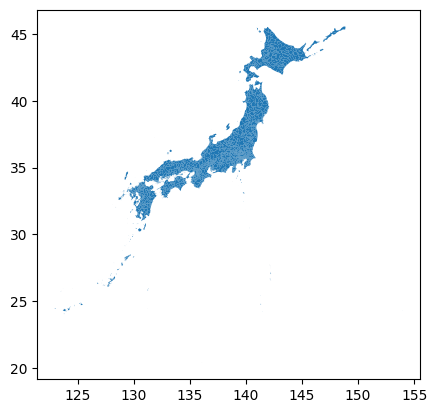

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# SHPファイルの読み込み
shp_path = 'gm-jpn-bnd_u_2_1/polbnda_jpn.shp'
gdf = gpd.read_file(shp_path)

# GeoDataFrameの内容を確認
print(gdf.head())

# プロット
gdf.plot()
plt.show()


nam
Aichi Ken     MULTIPOLYGON (((136.96809 34.72360, 136.97200 ...
Akita Ken     MULTIPOLYGON (((139.52360 39.17861, 139.52027 ...
Aomori Ken    MULTIPOLYGON (((140.34250 40.45127, 140.30991 ...
Chiba Ken     MULTIPOLYGON (((139.82690 34.92533, 139.75290 ...
Ehime Ken     MULTIPOLYGON (((132.43150 32.92993, 132.43150 ...
dtype: geometry


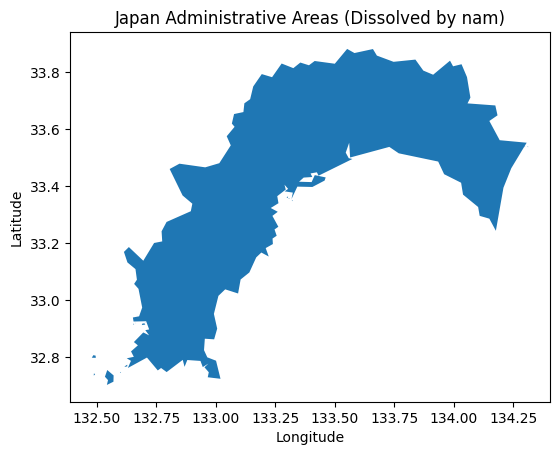

In [36]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# SHPファイルのパス
shp_path = 'gm-jpn-bnd_u_2_1/polbnda_jpn.shp'

# SHPファイルを読み込む
gdf = gpd.read_file(shp_path)


# 東京の処理

# namが"Tokyo To"の行を抽出する
tokyo_gdf = gdf[gdf['nam'] == 'Tokyo To']

# laa属性の末尾が"Shi"または"Ku"、"Hinode Machi"の行を抽出する
filtered_tokyo_gdf = tokyo_gdf[tokyo_gdf['laa'].str.endswith(('Shi','Ku','Hinode Machi'))]

# 元のGeoDataFrameからTokyo Toの行を削除する
gdf = gdf[gdf['nam'] != 'Tokyo To']

# Tokyo Toの行にフィルタリングされた結果を追加する
gdf = gpd.GeoDataFrame(pd.concat([gdf, filtered_tokyo_gdf]))

# nam属性で領域を結合
gdf_dissolved = gdf.dissolve(by='nam')
simplified_geometry = gdf_dissolved.simplify(tolerance=0.01, preserve_topology=True)

# 結合されたデータの先頭を表示
print(simplified_geometry.head())

# プロット
simplified_geometry[simplified_geometry.index == 'Kochi Ken'].plot()
plt.title('Japan Administrative Areas (Dissolved by nam)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [37]:
# 一つのGeoJSONファイルとして保存
output_geojson_path = 'pref.geojson'
simplified_geometry.to_file(output_geojson_path, driver='GeoJSON')

In [16]:
import os
# laa属性で領域を結合
gdf_dissolved = gdf.dissolve(by='laa')

# 一つのGeoJSONファイルとして保存
output_geojson_path = 'town.geojson'
output_dir = "town"

# 各都道府県をGeoJSON形式で保存
for name, group in gdf_dissolved.groupby('nam'):
    # ファイル名に使用できない文字を置換する
    safe_name = name.split(' ')[0].lower().replace('/', '_')
    output_geojson_path = os.path.join(output_dir, f'{safe_name}.geojson')
    simplified_geometry = group.simplify(tolerance=0.1, preserve_topology=True)
    simplified_geometry.to_file(output_geojson_path, driver='GeoJSON')

    print(f'Saved {output_geojson_path}')

Saved town/aichi.geojson
Saved town/akita.geojson
Saved town/aomori.geojson
Saved town/chiba.geojson
Saved town/ehime.geojson
Saved town/fukui.geojson
Saved town/fukuoka.geojson
Saved town/fukushima.geojson
Saved town/gifu.geojson
Saved town/gunma.geojson
Saved town/hiroshima.geojson
Saved town/hokkai.geojson
Saved town/hyogo.geojson
Saved town/ibaraki.geojson
Saved town/ishikawa.geojson
Saved town/iwate.geojson
Saved town/kagawa.geojson
Saved town/kagoshima.geojson
Saved town/kanagawa.geojson
Saved town/kochi.geojson
Saved town/kumamoto.geojson
Saved town/kyoto.geojson
Saved town/mie.geojson
Saved town/miyagi.geojson
Saved town/miyazaki.geojson
Saved town/nagano.geojson
Saved town/nagasaki.geojson
Saved town/nara.geojson
Saved town/niigata.geojson
Saved town/oita.geojson
Saved town/okayama.geojson
Saved town/okinawa.geojson
Saved town/osaka.geojson
Saved town/saga.geojson
Saved town/saitama.geojson
Saved town/shiga.geojson
Saved town/shimane.geojson
Saved town/shizuoka.geojson
Saved t

In [38]:
!cp pref.geojson ../public/data/
!cp -r town ../public/data/